https://github.com/skchandrappa/dsa-cookbook.git


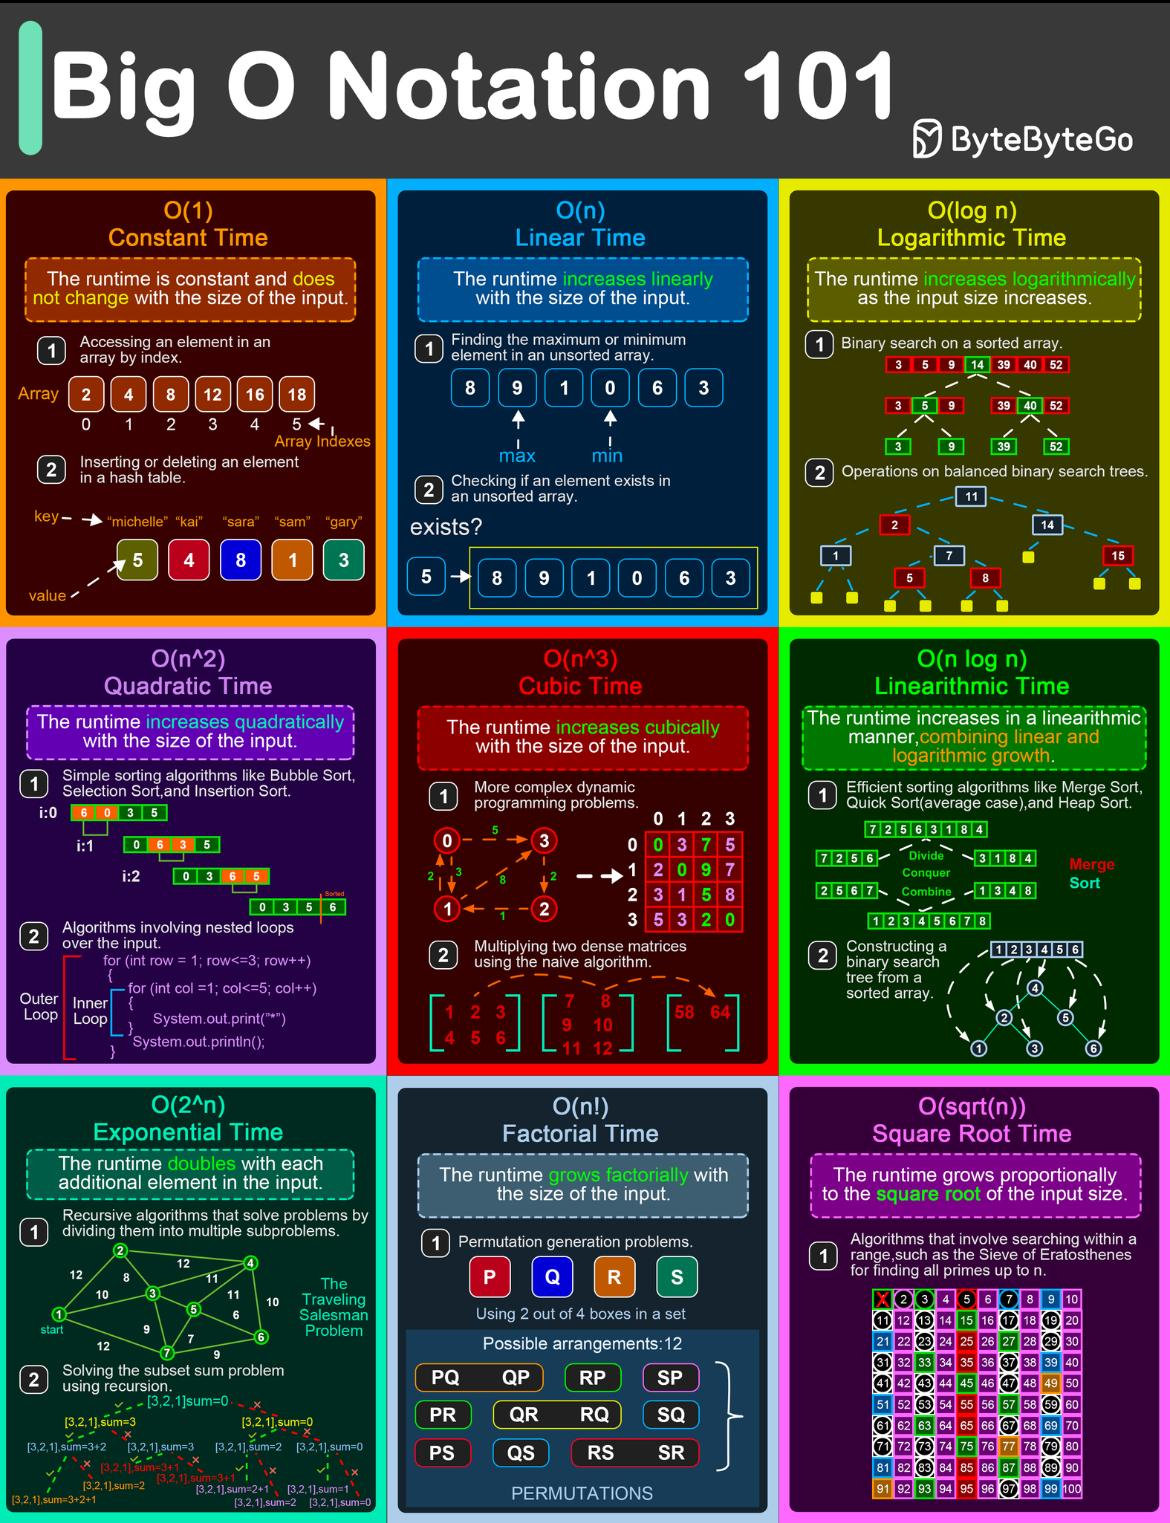# New Section